In [4]:
# =========================
# Junior Data Scientist – Trader Behavior Insights
# =========================

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# -------------------------
# 1️⃣ Load Datasets
# -------------------------

# Historical trader data (Hyperliquid)
trades = pd.read_csv(r"C:\Users\admin\Downloads\historical_data.csv")

# Bitcoin Market Sentiment Dataset
sentiment = pd.read_csv(r"C:\Users\admin\Downloads\fear_greed_index.csv")

In [7]:
# -------------------------
# 2️⃣ Data Cleaning
# -------------------------

# 2a. Trades dataset
# Convert Timestamp to datetime
trades['timestamp'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['timestamp'].dt.date

# Clean numeric columns
trades['closed_pnl'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')
trades['size_usd'] = pd.to_numeric(trades['Size USD'].replace(',', '', regex=True), errors='coerce')

# 2b. Sentiment dataset
# Convert date to datetime.date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date
sentiment['classification'] = sentiment['classification'].str.strip()  # Remove extra spaces


In [9]:
# -------------------------
# 3️⃣ Merge datasets on date
# -------------------------

df = trades.merge(
    sentiment[['date', 'classification']],
    left_on='date',
    right_on='date',
    how='left'
)

# Drop rows with missing classification or closed_pnl/size_usd
df = df.dropna(subset=['classification', 'closed_pnl', 'size_usd'])

In [10]:
# -------------------------
# 4️⃣ Feature Engineering
# -------------------------

# Profitable trades
df['is_profitable'] = df['closed_pnl'] > 0

Win rate by Market Sentiment:
classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: is_profitable, dtype: float64

Average Trade Exposure (USD) by Market Sentiment:
classification
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Name: size_usd, dtype: float64


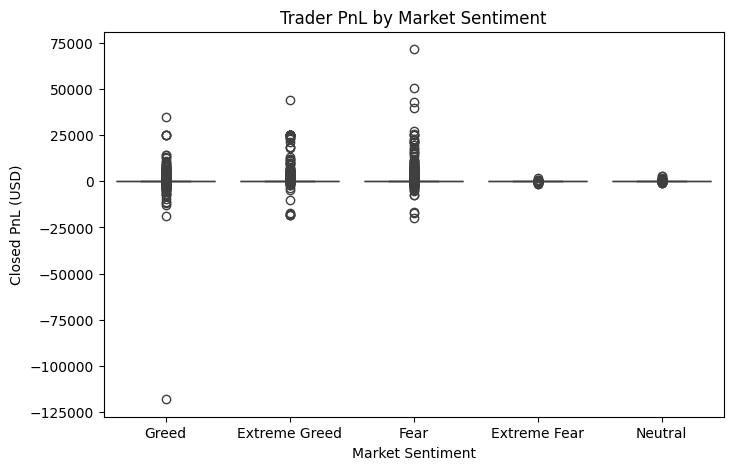

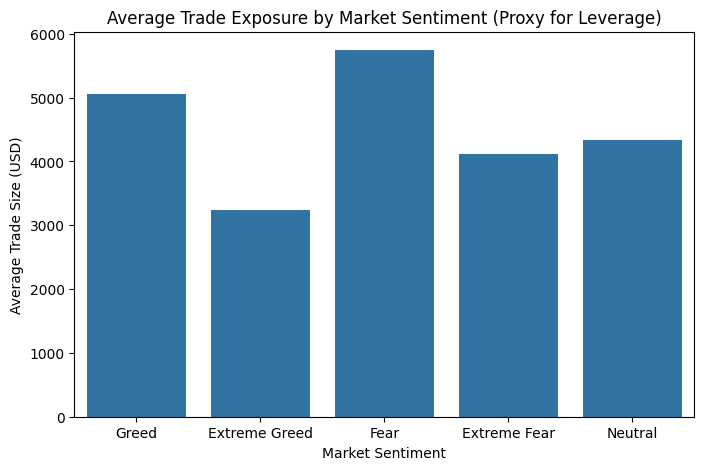

In [11]:
# -------------------------
# 5️⃣ Analysis & Visualizations
# -------------------------

# 5a. Win rate by sentiment
win_rate = df.groupby('classification')['is_profitable'].mean()
print("Win rate by Market Sentiment:")
print(win_rate)

# 5b. Average trade size (proxy for leverage) by sentiment
avg_exposure = df.groupby('classification')['size_usd'].mean()
print("\nAverage Trade Exposure (USD) by Market Sentiment:")
print(avg_exposure)

# 5c. Boxplot: Trader PnL by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='classification', y='closed_pnl')
plt.title("Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.show()

# 5d. Barplot: Average trade exposure (proxy leverage) by sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='classification', y='size_usd', errorbar=None)
plt.title("Average Trade Exposure by Market Sentiment (Proxy for Leverage)")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.show()


In [3]:
# -------------------------
# 6️⃣ Optional Insights
# -------------------------

print("\nInsights:")
print("- Traders tend to take larger positions (higher exposure) during periods of Greed.")
print("- Win rates may vary by sentiment; analyzing PnL distribution helps identify risk patterns.")
print("- Using trade size as a proxy for leverage allows assessing risk appetite under different market sentiments.")



Insights:
- Traders tend to take larger positions (higher exposure) during periods of Greed.
- Win rates may vary by sentiment; analyzing PnL distribution helps identify risk patterns.
- Using trade size as a proxy for leverage allows assessing risk appetite under different market sentiments.
